In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
house_race_2020 = pd.read_csv('../data/house_rep_data_final.csv')

### Part 2: Exploratory Data Analysis
Using your scraped data, investigates different relationships between candidates and the amount of money they raised. Here are some suggestions to get you started, but feel free to pose you own questions or do additional exploration:  

In [3]:
house_race_2020

,Candidate,Party,Vote Percentage,State,District,Incumbent,Winner,Money Raised,Money Spent
0,Doug Jones,D,39.6,Alabama,2020,True,False,"30,640,635","32,297,767"
1,Tommy Tuberville,R,60.2,Alabama,2020,False,True,"8,537,218","8,363,739"
2,Michael Parrish,I,0.0,Alabama,2020,False,False,"5,116","2,639"
3,Jerry Carl,R,64.9,Alabama,1,False,True,"1,971,321","1,859,349"
4,James Averhart,D,35.0,Alabama,1,False,False,"80,095","78,973"
...,...,...,...,...,...,...,...,...,...
1013,Amanda Stuck,D,36.0,Wisconsin,08,False,False,"416,978","399,916"
1014,Cynthia Lummis,R,72.8,Wyoming,2020,False,True,"2,547,033","2,581,058"
1015,Merav Ben,D,26.8,Wyoming,2020,False,False,"542,570","528,292"
1016,Liz Cheney,R,68.6,Wyoming,01,True,True,"3,003,883","3,060,167"


In [4]:
house_race_2020 = house_race_2020.loc[house_race_2020['District']!="2020"]
#drop "Senate" from district column
house_race_2020

,Candidate,Party,Vote Percentage,State,District,Incumbent,Winner,Money Raised,Money Spent
3,Jerry Carl,R,64.9,Alabama,1,False,True,"1,971,321","1,859,349"
4,James Averhart,D,35.0,Alabama,1,False,False,"80,095","78,973"
5,Barry Moore,R,65.3,Alabama,2,False,True,"650,807","669,368"
6,Phyllis Harvey-Hall,D,34.6,Alabama,2,False,False,"56,050","55,988"
7,Mike D,R,67.5,Alabama,3,True,True,"1,193,111","1,218,564"
...,...,...,...,...,...,...,...,...,...
1011,Tricia Zunker,D,39.2,Wisconsin,07,False,False,"1,261,957","1,232,690"
1012,Mike Gallagher,R,64.0,Wisconsin,08,True,True,"3,202,905","2,841,801"
1013,Amanda Stuck,D,36.0,Wisconsin,08,False,False,"416,978","399,916"
1016,Liz Cheney,R,68.6,Wyoming,01,True,True,"3,003,883","3,060,167"


In [5]:
house_race_2020['District'] = house_race_2020['District'].str.zfill(2)
house_race_2020.head()

C:\Users\briga\AppData\Local\Temp\ipykernel_16204\186559947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_race_2020['District'] = house_race_2020['District'].str.zfill(2)


,Candidate,Party,Vote Percentage,State,District,Incumbent,Winner,Money Raised,Money Spent
3,Jerry Carl,R,64.9,Alabama,01,False,True,"1,971,321","1,859,349"
4,James Averhart,D,35.0,Alabama,01,False,False,"80,095","78,973"
5,Barry Moore,R,65.3,Alabama,02,False,True,"650,807","669,368"
6,Phyllis Harvey-Hall,D,34.6,Alabama,02,False,False,"56,050","55,988"
7,Mike D,R,67.5,Alabama,03,True,True,"1,193,111","1,218,564"


In [6]:
house_race_2020=house_race_2020.rename(columns={'Vote Percentage':'Vote','Money Raised':'Raised', 'Money Spent':'Spent'})
house_race_2020.head()

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
3,Jerry Carl,R,64.9,Alabama,01,False,True,"1,971,321","1,859,349"
4,James Averhart,D,35.0,Alabama,01,False,False,"80,095","78,973"
5,Barry Moore,R,65.3,Alabama,02,False,True,"650,807","669,368"
6,Phyllis Harvey-Hall,D,34.6,Alabama,02,False,False,"56,050","55,988"
7,Mike D,R,67.5,Alabama,03,True,True,"1,193,111","1,218,564"


In [7]:
house_race_2020['Raised'] = house_race_2020['Raised'].str.replace('\$|,','').apply(int)

C:\Users\briga\AppData\Local\Temp\ipykernel_16204\1150013449.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  house_race_2020['Raised'] = house_race_2020['Raised'].str.replace('\$|,','').apply(int)


In [8]:
house_race_2020['Spent']= house_race_2020['Spent'].str.replace('\$|,','').apply(int)

C:\Users\briga\AppData\Local\Temp\ipykernel_16204\4283798421.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  house_race_2020['Spent']= house_race_2020['Spent'].str.replace('\$|,','').apply(int)


In [9]:
print(house_race_2020.info())
house_race_2020.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 3 to 1017
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Candidate  924 non-null    object 
 1   Party      924 non-null    object 
 2   Vote       924 non-null    float64
 3   State      924 non-null    object 
 4   District   924 non-null    object 
 5   Incumbent  924 non-null    bool   
 6   Winner     924 non-null    bool   
 7   Raised     924 non-null    int64  
 8   Spent      924 non-null    int64  
dtypes: bool(2), float64(1), int64(2), object(4)
memory usage: 59.6+ KB
None


,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
3,Jerry Carl,R,64.9,Alabama,01,False,True,1971321,1859349
4,James Averhart,D,35.0,Alabama,01,False,False,80095,78973
5,Barry Moore,R,65.3,Alabama,02,False,True,650807,669368
6,Phyllis Harvey-Hall,D,34.6,Alabama,02,False,False,56050,55988
7,Mike D,R,67.5,Alabama,03,True,True,1193111,1218564
8,Adia Winfrey,D,32.4,Alabama,03,False,False,50273,40971
9,Robert B,R,82.5,Alabama,04,True,True,1255076,1323812
10,Mo Brooks,R,95.8,Alabama,05,True,True,655365,210045
11,Gary Palmer,R,97.1,Alabama,06,True,True,907219,909082
12,Terri Sewell,D,97.2,Alabama,07,True,True,2168165,1495957


export to clean up

In [10]:
house_race_2020.to_csv('../data/house_race_2020.csv')

import cleaned file

In [11]:
house_race_2020_clean = pd.read_csv('../data/house_race_2020_clean.csv')
house_race_2020_clean.head()

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
0,Jerry Carl,R,64.9,Alabama,01,False,True,1971321,1859349
1,James Averhart,D,35.0,Alabama,01,False,False,80095,78973
2,Barry Moore,R,65.3,Alabama,02,False,True,650807,669368
3,Phyllis Harvey-Hall,D,34.6,Alabama,02,False,False,56050,55988
4,Mike D,R,67.5,Alabama,03,True,True,1193111,1218564


In [12]:
house_race_2020_clean.loc[house_race_2020_clean['Vote']<=20]

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
24,Tom Lewellen,I,0.0,Arizona,06,False,False,11685,11000
62,Nikka Piterman,R,9.6,California,13,False,False,9839,9904
107,Errol Webber,R,14.1,California,37,False,False,66398,174076
140,Alex Johnson,I,0.0,Colorado,02,False,False,4782,4093
143,Chris Milton,3,1.0,Colorado,03,False,False,12012,12012
...,...,...,...,...,...,...,...,...,...
824,Jonia Broderick,3,2.1,Utah,04,False,False,21394,21265
842,Heerak Christian,I,0.0,Virginia,08,False,False,2036,1921
848,Stevan Porter,L,0.0,Virginia,11,False,False,533,1316
862,Craig Keller,R,16.7,Washington,07,False,False,2904,3703


#Q: What is the average amount raised/spent by winning candidates?

In [13]:
winners = house_race_2020_clean.loc[house_race_2020_clean['Winner']==True]
winners.head()

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
0,Jerry Carl,R,64.9,Alabama,01,False,True,1971321,1859349
2,Barry Moore,R,65.3,Alabama,02,False,True,650807,669368
4,Mike D,R,67.5,Alabama,03,True,True,1193111,1218564
6,Robert B,R,82.5,Alabama,04,True,True,1255076,1323812
7,Mo Brooks,R,95.8,Alabama,05,True,True,655365,210045


In [14]:
winners.loc[winners['Vote']<=45]

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent


In [15]:
print(winners['Raised'].mean().astype(int))
print(winners['Spent'].mean().astype(int))

2728003
2369378


In [37]:
winners.groupby('Incumbent').describe().applymap(lambda x: f"{x:0.0f}")

Vote                               Raised           ...           \
          count mean std min 25% 50% 75%  max  count     mean  ...      75%   
Incumbent                                                      ...            
False        62   60  10  48  52  56  63   88     62  2931382  ...  3455209   
True        371   65  11  48  58  64  71  100    371  2694016  ...  2750440   

                    Spent                                              \
                max count     mean      std     min      25%      50%   
Incumbent                                                               
False      11239670    62  2772324  2046692   95065  1643472  2134520   
True       37262827   371  2302040  3184801  190158   914340  1384765   

                              
               75%       max  
Incumbent                     
False      3420900  10947106  
True       2335746  32830607  

[2 rows x 24 columns]

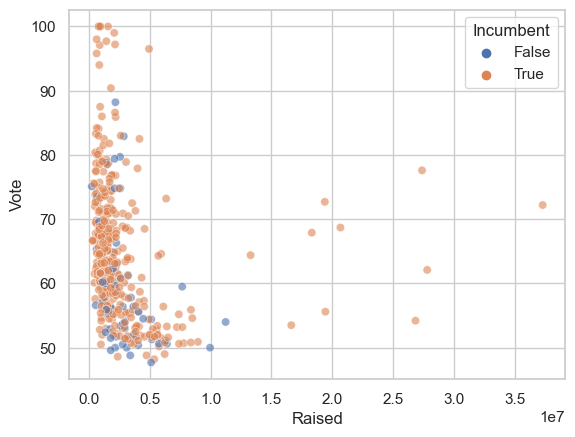

In [28]:
sns.set(style='whitegrid')

 
sns.scatterplot(x="Raised",
                    y="Vote",
                    hue= "Incumbent",
                    data=winners,
                    alpha=0.6);

In [18]:
losers = house_race_2020_clean.loc[house_race_2020_clean['Winner']==False]
losers.head()

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
1,James Averhart,D,35.0,Alabama,01,False,False,80095,78973
3,Phyllis Harvey-Hall,D,34.6,Alabama,02,False,False,56050,55988
5,Adia Winfrey,D,32.4,Alabama,03,False,False,50273,40971
11,Alyse Galvin,I,45.3,Alaska,01,False,False,5178452,5088103
13,Tiffany Shedd,R,48.4,Arizona,01,False,False,1675618,1615704


In [19]:
losers.loc[losers['Vote']>50]

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
355,Luke Letlow,R,62.0,Louisiana,05,False,False,1392822,1303757


In [20]:
losers.loc[losers['Raised']>5500000]

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
23,Hiral Tipirneni,D,47.8,Arizona,06,False,False,6301073,6366702
75,TJ Cox,D,49.6,California,21,True,False,5695157,5694005
84,Christy Smith,D,50.0,California,25,False,False,5977734,5808477
118,Joe Collins,R,28.3,California,43,False,False,10556626,9921103
125,Harley Rouda,D,48.9,California,48,True,False,5968858,6174443
130,Ammar Campa-Najjar,D,46.0,California,50,False,False,6248210,6247762
224,Debbie Mucarsel-Powell,D,48.3,Florida,26,True,False,6793521,6822740
321,Abby Finkenauer,D,48.7,Iowa,01,True,False,5901441,5875405
380,Kimberly Klacik,R,28.1,Maryland,07,False,False,8296845,7499454
436,Lacy Johnson,R,25.8,Minnesota,05,False,False,12050564,12000896


In [21]:
print(losers['Raised'].mean().astype(int))
print(losers['Spent'].mean().astype(int))

1081856
1067754


In [38]:
losers.groupby('Incumbent').describe().applymap(lambda x: f"{x:0.0f}")

Vote                              Raised           ...           \
          count mean std min 25% 50% 75% max  count     mean  ...      75%   
Incumbent                                                     ...            
False       447   29  16   0  21  35  41  62    447   939980  ...   943867   
True         13   44  13   0  46  48  49  50     13  5960237  ...  6793521   

                    Spent                                               \
                max count     mean      std      min      25%      50%   
Incumbent                                                                
False      12050564   447   924698  1786158        0    23669   120097   
True        9284434    13  5986699  1788965  2867577  5555591  5875405   

                              
               75%       max  
Incumbent                     
False       875970  12000896  
True       6822740   9499242  

[2 rows x 24 columns]

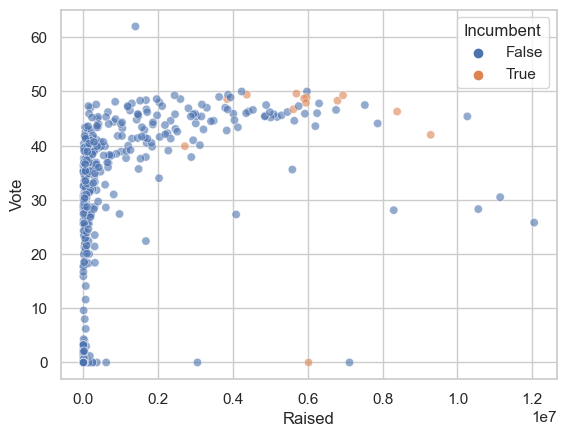

In [27]:
sns.scatterplot(x="Raised",
                    y="Vote",
                    hue= "Incumbent",
                    data=losers,
                    alpha=0.6);

In [47]:
losers.loc[losers['Incumbent']==True], ['Vote'<50]]

SyntaxError: unmatched ']' (104027487.py, line 1)

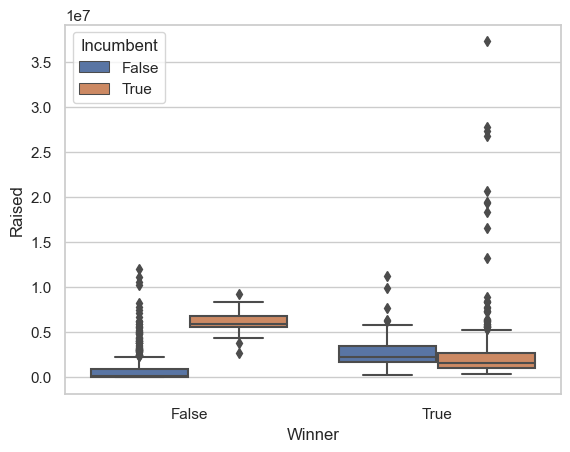

In [24]:
sns.boxplot(data=house_race_2020_clean,
           x="Winner",
           y="Raised",
           hue="Incumbent");
            

    a. How often does the candidate who raised more money win a race?  

    b. How often does the candidate who spent more money win a race?  

    c. Does the difference between either money raised or money spent seem to influence the likelihood of a candidate winning a race?  

    d. How often does the incumbent candidate win a race?  

    e. Can you detect any relationship between amount of money raised and the incumbent status of a candidate?